### **GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP)-THE SPARKS FOUNDATION**

**NAME: ABITHA J S**

**DOMAIN: DATA SCIENCE AND BUSINESS ANALYTICS**

**TASK 1 : PREDICTION USING SUPERVISED ML**

**BATCH: JUNE-2023**

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Reading a dataset
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **ANALYZING DATA**

In [5]:
data.shape

(25, 2)

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data["Scores"].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

In [11]:
data["Scores"].value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **VISUALIZING DATA**

<Axes: >

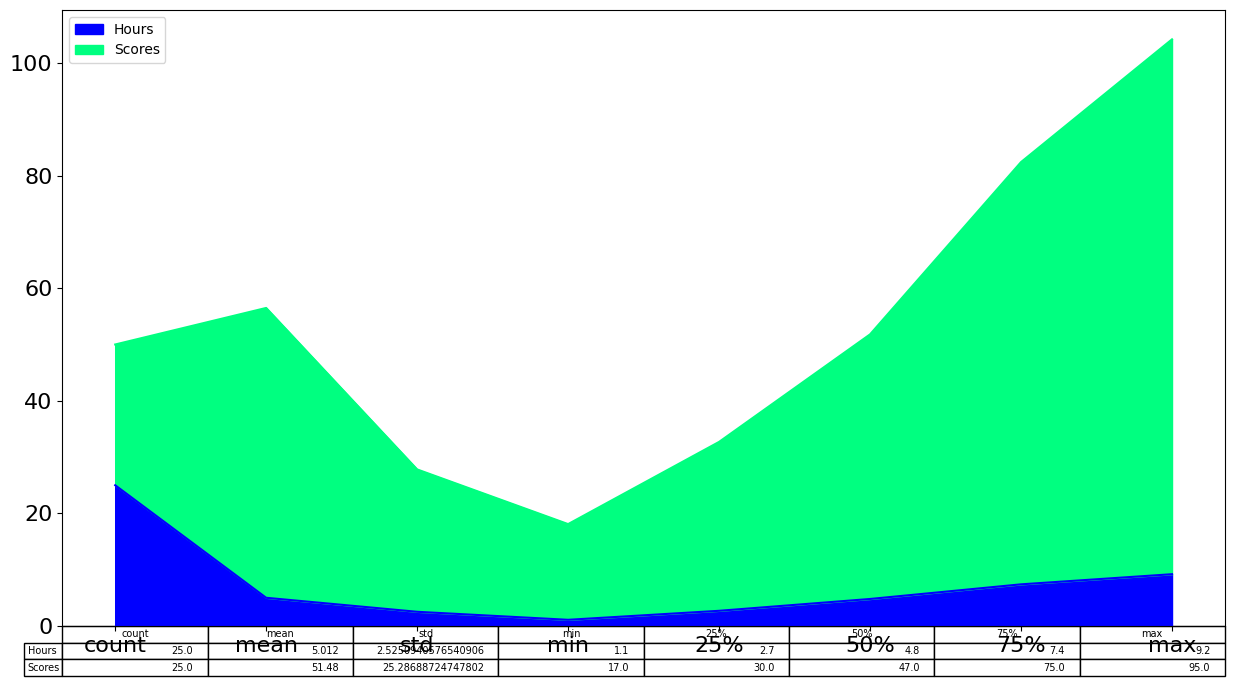

In [13]:
data.describe().plot(kind = "area",fontsize=16, figsize = (15,8), table = True, colormap="winter")


### ***Our goal is to predict the percentage of a student based on the no. of study hours***


### ***As, there are only 2 columns ,among which one is the feature and the other one is the target***

### ***Hours can be considered as feature variable & Scores as target***

<ipython-input-14-8acd5af24b08>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hours"],color='Purple')


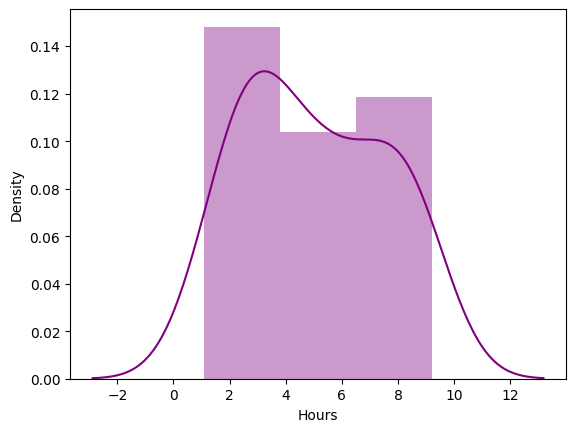

In [14]:
sns.distplot(data["Hours"],color='Purple')
plt.show()

<ipython-input-15-8386586ec0c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Scores"],color='red')


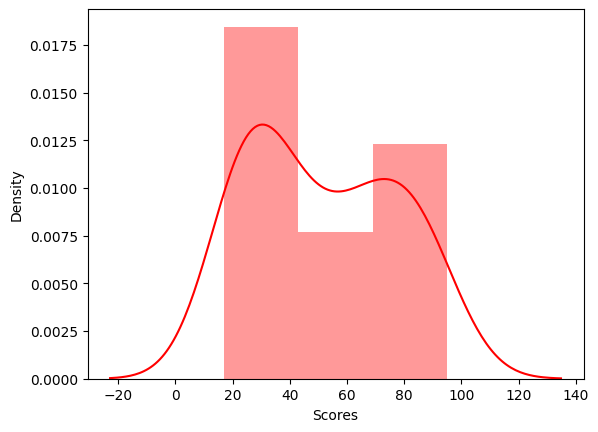

In [15]:
sns.distplot(data["Scores"],color='red')
plt.show()

In [16]:
x= data.drop('Scores',axis=1)
y= data.drop('Hours',axis=1)

In [17]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

<ipython-input-18-6679707503dd>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x='Hours',data=x,palette='viridis',kde=True)


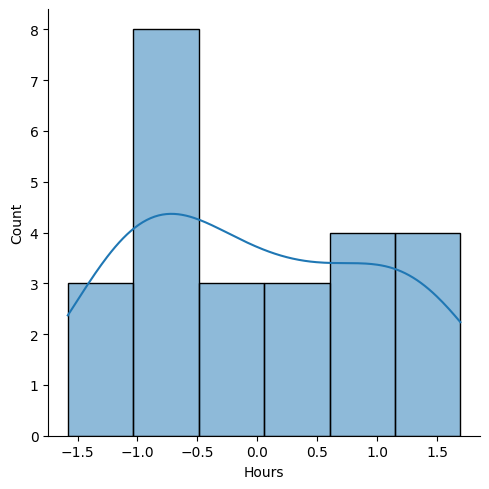

In [18]:
#Feature Scaling
ss=StandardScaler()
x['Hours']=ss.fit_transform(x[['Hours']])
sns.displot(x='Hours',data=x,palette='viridis',kde=True)
plt.show()

# **BUILDING MODEL**

**LINEAR REGRESSION**

In [19]:
#Fitting the Simple Linear Regression model to the training dataset
linear= LinearRegression()
linear.fit(x_train, y_train)
res_tlr=linear.predict(x_train)
res_lr=linear.predict(x_test)
res_lr

array([[17.04289179],
       [33.51695377],
       [74.21757747],
       [26.73351648],
       [59.68164043],
       [39.33132858],
       [20.91914167],
       [78.09382734],
       [69.37226512]])

In [20]:
#Evaluation metrics
#(a) R-Squared
from sklearn.metrics import r2_score
r2=r2_score(y_test,res_lr)
r2

0.9555700801388128

In [21]:
#(b) MAE and MSE
MAE=metrics.mean_absolute_error(y_test,res_lr)
MSE=metrics.mean_squared_error(y_test,res_lr)
print('Mean Absolute Error : ',MAE)
print('Mean Squared Error : ',MSE)

Mean Absolute Error :  4.691397441397446
Mean Squared Error :  25.463280738222593


In [22]:
#(c) RMSE
from math import sqrt
rmse=sqrt(MSE)
print('Root Mean Squared Error : ',rmse)

Root Mean Squared Error :  5.046115410711748


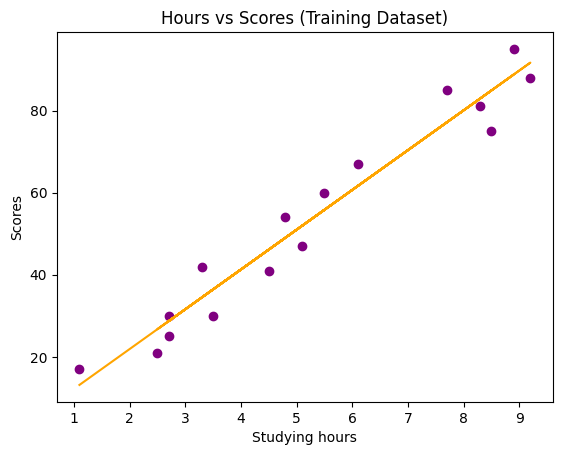

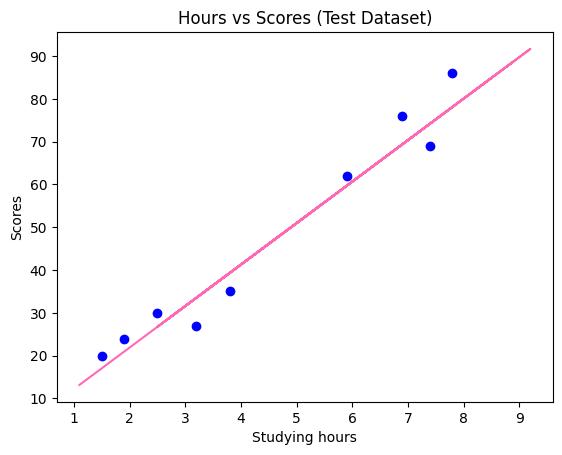

In [25]:
#Step: 4. visualizing the Training set results:

plt.scatter(x_train, y_train, color="purple")
plt.plot(x_train, res_tlr, color="orange")
plt.title("Hours vs Scores (Training Dataset)")
plt.xlabel("Studying hours")
plt.ylabel("Scores")
plt.show()

#visualizing the Test set results
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_train, res_tlr, color="hotpink")
plt.title("Hours vs Scores (Test Dataset)")
plt.xlabel("Studying hours")
plt.ylabel("Scores")
plt.show()

# **BUILDING A PREDICTIVE SYSTEM**

In [26]:
i=float(input('Enter studying hours of a student : '))

Enter studying hours of a student : 14


In [27]:
i_array=np.array(i)
i_array=i_array.reshape(1,-1)
ans=linear.predict(i_array)
print('The Percentage of this student is predicted as ',ans[0])

The Percentage of this student is predicted as  [138.17570043]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
